# Black Lives Matter in the News: Data Collection and Sentiment Analysis
An exploration of how the news has been portrayed the Black Lives Matter movement and other conflicting movements including Blue Lives Matter and All Lives matter over the past month. My project is composed of multiple Jupyter notebooks to collect data, analyze the sentiment of the news and visualize the reseach I completed. 

In [20]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import datetime
import pytz
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
from textblob import TextBlob, Word, Blobber
import seaborn as sns

In [21]:
scope = ['https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name("creds.json", scope)
client = gspread.authorize(creds)
sheet = client.open("DIGHUM Sentiment").worksheet("GoogleNews")
googleDF = pd.DataFrame(sheet.get_all_records())
#Converting string dates to datetime objects
googleDF['date'] = [pytz.utc.localize(datetime.datetime.strptime(d, '%a, %d %b %Y %H:%M:%S %Z')) for d in list(googleDF['date'])]
googleDF



,query,date,source,title,description
0,Black Lives Matter,2020-06-29 20:00:00+00:00,NPR,India Sees A Change Sparked By Black Lives Mat...,India Sees A Change Sparked By Black Lives Mat...
1,Black Lives Matter,2020-06-29 23:09:01+00:00,ESPN,"Sources: NBA, union plan to paint 'Black Lives...","Sources: NBA, union plan to paint 'Black Lives..."
2,Black Lives Matter,2020-06-29 12:15:00+00:00,Black Enterprise,Let's Not Turn Black Lives Matter Into Black L...,Let's Not Turn Black Lives Matter Into Black L...
3,Black Lives Matter,2020-06-29 20:03:48+00:00,CNN,Indians are being held up as a model minority....,Indians are being held up as a model minority....
4,Black Lives Matter,2020-06-29 12:22:00+00:00,Al Jazeera America,Are women being left out of the Black Lives Ma...,Are women being left out of the Black Lives Ma...
...,...,...,...,...,...
4057,Blue Lives Matter,2020-06-14 15:27:12+00:00,BabyGaga,The Most Controversial Baby Names Of 2020 | Ba...,The Most Controversial Baby Names Of 2020 | Ba...
4058,Blue Lives Matter,2020-06-15 00:08:26+00:00,TheNewsTrace,Blue Peter delivers powerful message for kids ...,Blue Peter delivers powerful message for kids ...
4059,Blue Lives Matter,2020-06-14 19:52:00+00:00,New Haven Register,Egypt: Ethiopia rejecting 'fundamental issues'...,Egypt: Ethiopia rejecting 'fundamental issues'...
4060,Blue Lives Matter,2020-06-14 14:00:00+00:00,The Canberra Times,Why not build a hydrotherapy pool to service C...,Why not build a hydrotherapy pool to service C...


In [22]:
sheet = client.open("DIGHUM Sentiment").worksheet("YahooNews")
yahooDF = pd.DataFrame(sheet.get_all_records())
yahooDF['date'] = [datetime.datetime.strptime(d, '%a, %d %b %Y %H:%M:%S %z') for d in list(yahooDF['date'])]
yahooDF

,query,date,source,title,description
0,Black Lives Matter,2020-06-29 13:47:00-04:00,NBC News,Israel orders evangelical Christian media netw...,&quot;The channel does not appeal to the Chris...
1,Black Lives Matter,2020-06-29 05:37:36-04:00,Business Insider,Russia denies being behind a mysterious radiat...,"Finland, Sweden, and Norway reported increased..."
2,Black Lives Matter,2020-06-29 09:54:13-04:00,USA TODAY,"What we know about Steven Lopez, the suspect i...",Steven Lopez is accused of firing a gun into t...
3,Black Lives Matter,2020-06-29 04:14:20-04:00,Reuters,Man arrested over fatal shooting in Kentucky p...,"""The man has been participating in the protest..."
4,Black Lives Matter,2020-06-29 14:35:41-04:00,Miami Herald,More than 70 San Antonio police officers in co...,The spike corresponds with a large increase in...
...,...,...,...,...,...
2228,Blue Lives Matter,2020-06-13 20:58:21-04:00,The Daily Beast,Trump’s Deployment of National Guard to Deal W...,"Germany’s R-rate, the crucial metric used to d..."
2229,Blue Lives Matter,2020-06-14 13:58:50-04:00,The Telegraph,Germany&#39;s R-rate spikes above 1 ahead of t...,El Salvador's president says that a stringent ...
2230,Blue Lives Matter,2020-06-14 11:12:25-04:00,Associated Press,Virus lockdown ends in El Salvador amid clash ...,China reported dozens of new coronavirus cases...
2231,Blue Lives Matter,2020-06-15 00:51:05-04:00,AFP,China virus cluster grows as European borders ...,"“We’re relentless,” one school principal said...."


In [23]:
sheet = client.open("DIGHUM Sentiment").worksheet("BingNews")
bingDF = pd.DataFrame(sheet.get_all_records())
bingDF['date'] = [pytz.utc.localize(datetime.datetime.strptime(d, '%a, %d %b %Y %H:%M:%S %Z')) for d in list(bingDF['date'])]
bingDF

,query,date,source,title,description
0,Black Lives Matter,2020-06-29 20:48:00+00:00,NESN,Black Lives Matter,"The NBA and WNBA might be resuming play soon, ..."
1,Black Lives Matter,2020-06-29 16:47:00+00:00,Bleacher Report,"NBA, WNBA Plan To Paint ‘Black Lives Matter’ O...","The NBA will paint ""Black Lives Matter"" on all..."
2,Black Lives Matter,2020-06-29 19:13:00+00:00,USA Today on MSN.com,NBA Reportedly Plans to Paint 'Black Lives Mat...,The NBA and the players union have agreed to h...
3,Black Lives Matter,2020-06-29 21:36:32+00:00,deseret on MSN.com,'Black Lives Matter' to be painted on courts a...,Every time it’s been a month I just start gett...
4,Black Lives Matter,2020-06-29 17:19:00+00:00,CBSSports.com,"Black Lives Matter Utah founder talks racism, ...","According to ESPN's Adrian Wojnarowski, Zach L..."
...,...,...,...,...,...
554,Blue Lives Matter,2020-06-05 21:41:00+00:00,The Daily Beast,Third weekend of protests opposed by 'Blue Liv...,"During a series of tense all-hands meetings, e..."
555,Blue Lives Matter,2020-06-12 18:36:00+00:00,Newsweek,Staff Calls for Shutdown of Sports Illustrated...,Warriors for Christ is considered an extremist...
556,Blue Lives Matter,2020-06-14 20:23:00+00:00,Daily Mail,"Hate Group Sues D.C. Mayor Over Street Mural, ...",The 'highly inappropriate' shirts which also h...
557,Blue Lives Matter,2020-06-09 16:34:00+00:00,Sacramento Bee,Policeman sacked and 17 other officers under i...,A Greenhaven resident tied blue ribbons on tre...


In [24]:
def addSentimentValues(df):
    start = datetime.datetime.now()
    analyzer = SentimentIntensityAnalyzer()
    titleNegatives = []
    titleNeutrals = []
    titlePositives = []
    titleCompounds = []
    descriptionPositives = []
    descriptionNeutrals = []
    descriptionNegatives = []
    
    descriptionCompounds = []
    titleTBsentiments = []
    descriptionTBsentiments = []
    titleTBsubjectivitys = []
    descriptionTBsubjectivitys = []
    for i in range(len(df['description'])):
        title = df['title'][i]
        description = df['description'][i]

        titleAnalysis = analyzer.polarity_scores(title)

        titleNegatives.append(titleAnalysis['neg'])
        titleNeutrals.append(titleAnalysis['neu'])
        titlePositives.append(titleAnalysis['pos'])
        titleCompounds.append(titleAnalysis['compound'])
    
    
        descriptionAnalysis = analyzer.polarity_scores(description)
        
        descriptionNegatives.append(descriptionAnalysis['neg'])
        descriptionNeutrals.append(descriptionAnalysis['neu'])
        descriptionPositives.append(descriptionAnalysis['pos'])
        descriptionCompounds.append(descriptionAnalysis['compound'])
        
        
        titleTB = TextBlob(title).sentiment
        descriptionTB = TextBlob(description).sentiment
        
        titleTBsentiments.append(titleTB.polarity)
        descriptionTBsentiments.append(descriptionTB.polarity)
        titleTBsubjectivitys.append(titleTB.subjectivity)
        descriptionTBsubjectivitys.append(titleTB.subjectivity)
    df['title negative'] = titleNegatives
    df['title neutral'] = titleNeutrals
    df['title positive'] = titlePositives
    df['title compound'] = titleCompounds
    df['description negative'] = descriptionNegatives
    df['description neutral'] = descriptionNeutrals
    df['description positive'] = descriptionPositives
    df['description compound'] = descriptionCompounds
    df['tb title sentiment'] = titleTBsentiments
    df['tb title subjectivity'] = titleTBsubjectivitys
    df['tb description sentiment' ] = descriptionTBsentiments
    df['tb description subjectivity'] = descriptionTBsentiments
    end2 = datetime.datetime.now()
    change2 = end2 - start
    return df

In [25]:
googleDf = addSentimentValues(googleDF)
yahooDf = addSentimentValues(yahooDF)
bingDf = addSentimentValues(bingDF)

In [26]:
googleDf

,query,date,source,title,description,title negative,title neutral,title positive,title compound,description negative,description neutral,description positive,description compound,tb title sentiment,tb title subjectivity,tb description sentiment,tb description subjectivity
0,Black Lives Matter,2020-06-29 20:00:00+00:00,NPR,India Sees A Change Sparked By Black Lives Mat...,India Sees A Change Sparked By Black Lives Mat...,0.000,0.909,0.091,0.0258,0.000,0.891,0.109,0.0258,-0.166667,0.433333,-0.166667,-0.166667
1,Black Lives Matter,2020-06-29 23:09:01+00:00,ESPN,"Sources: NBA, union plan to paint 'Black Lives...","Sources: NBA, union plan to paint 'Black Lives...",0.000,0.927,0.073,0.0258,0.000,0.916,0.084,0.0258,-0.166667,0.433333,-0.166667,-0.166667
2,Black Lives Matter,2020-06-29 12:15:00+00:00,Black Enterprise,Let's Not Turn Black Lives Matter Into Black L...,Let's Not Turn Black Lives Matter Into Black L...,0.000,0.916,0.084,0.0258,0.000,0.891,0.109,0.0258,-0.166667,0.433333,-0.166667,-0.166667
3,Black Lives Matter,2020-06-29 20:03:48+00:00,CNN,Indians are being held up as a model minority....,Indians are being held up as a model minority....,0.094,0.851,0.055,-0.1994,0.105,0.834,0.061,-0.1994,-0.166667,0.433333,-0.166667,-0.166667
4,Black Lives Matter,2020-06-29 12:22:00+00:00,Al Jazeera America,Are women being left out of the Black Lives Ma...,Are women being left out of the Black Lives Ma...,0.000,0.927,0.073,0.0258,0.000,0.901,0.099,0.0258,-0.083333,0.216667,-0.083333,-0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,Blue Lives Matter,2020-06-14 15:27:12+00:00,BabyGaga,The Most Controversial Baby Names Of 2020 | Ba...,The Most Controversial Baby Names Of 2020 | Ba...,0.173,0.827,0.000,-0.2716,0.207,0.793,0.000,-0.2716,0.525000,0.725000,0.525000,0.525000
4058,Blue Lives Matter,2020-06-15 00:08:26+00:00,TheNewsTrace,Blue Peter delivers powerful message for kids ...,Blue Peter delivers powerful message for kids ...,0.205,0.600,0.195,-0.2960,0.228,0.556,0.217,-0.2960,0.044444,0.511111,0.044444,0.044444
4059,Blue Lives Matter,2020-06-14 19:52:00+00:00,New Haven Register,Egypt: Ethiopia rejecting 'fundamental issues'...,Egypt: Ethiopia rejecting 'fundamental issues'...,0.214,0.786,0.000,-0.4588,0.300,0.700,0.000,-0.4588,0.136364,0.454545,0.000000,0.000000
4060,Blue Lives Matter,2020-06-14 14:00:00+00:00,The Canberra Times,Why not build a hydrotherapy pool to service C...,Why not build a hydrotherapy pool to service C...,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000


In [27]:
yahooDf

,query,date,source,title,description,title negative,title neutral,title positive,title compound,description negative,description neutral,description positive,description compound,tb title sentiment,tb title subjectivity,tb description sentiment,tb description subjectivity
0,Black Lives Matter,2020-06-29 13:47:00-04:00,NBC News,Israel orders evangelical Christian media netw...,&quot;The channel does not appeal to the Chris...,0.000,0.851,0.149,0.2732,0.000,1.000,0.000,0.0000,0.0,0.00,0.000000,0.000000
1,Black Lives Matter,2020-06-29 05:37:36-04:00,Business Insider,Russia denies being behind a mysterious radiat...,"Finland, Sweden, and Norway reported increased...",0.321,0.679,0.000,-0.6369,0.000,0.909,0.091,0.2732,-0.2,0.85,0.150000,0.150000
2,Black Lives Matter,2020-06-29 09:54:13-04:00,USA TODAY,"What we know about Steven Lopez, the suspect i...",Steven Lopez is accused of firing a gun into t...,0.412,0.588,0.000,-0.7717,0.427,0.573,0.000,-0.9081,0.0,0.00,0.000000,0.000000
3,Black Lives Matter,2020-06-29 04:14:20-04:00,Reuters,Man arrested over fatal shooting in Kentucky p...,"""The man has been participating in the protest...",0.486,0.514,0.000,-0.8176,0.231,0.755,0.014,-0.9643,-0.1,0.10,-0.112500,-0.112500
4,Black Lives Matter,2020-06-29 14:35:41-04:00,Miami Herald,More than 70 San Antonio police officers in co...,The spike corresponds with a large increase in...,0.000,1.000,0.000,0.0000,0.000,0.827,0.173,0.3182,0.5,0.50,0.214286,0.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Blue Lives Matter,2020-06-13 20:58:21-04:00,The Daily Beast,Trump’s Deployment of National Guard to Deal W...,"Germany’s R-rate, the crucial metric used to d...",0.128,0.872,0.000,-0.2263,0.050,0.884,0.066,0.8130,0.0,0.00,0.107556,0.107556
2229,Blue Lives Matter,2020-06-14 13:58:50-04:00,The Telegraph,Germany&#39;s R-rate spikes above 1 ahead of t...,El Salvador's president says that a stringent ...,0.000,1.000,0.000,0.0000,0.080,0.861,0.059,-0.2023,0.0,0.10,0.066667,0.066667
2230,Blue Lives Matter,2020-06-14 11:12:25-04:00,Associated Press,Virus lockdown ends in El Salvador amid clash ...,China reported dozens of new coronavirus cases...,0.000,1.000,0.000,0.0000,0.071,0.877,0.052,-0.4767,0.0,0.00,0.040909,0.040909
2231,Blue Lives Matter,2020-06-15 00:51:05-04:00,AFP,China virus cluster grows as European borders ...,"“We’re relentless,” one school principal said....",0.000,1.000,0.000,0.0000,0.000,0.887,0.113,0.3182,0.0,0.00,0.500000,0.500000


In [28]:
bingDf

,query,date,source,title,description,title negative,title neutral,title positive,title compound,description negative,description neutral,description positive,description compound,tb title sentiment,tb title subjectivity,tb description sentiment,tb description subjectivity
0,Black Lives Matter,2020-06-29 20:48:00+00:00,NESN,Black Lives Matter,"The NBA and WNBA might be resuming play soon, ...",0.000,0.645,0.355,0.0258,0.000,0.831,0.169,0.7430,-0.166667,0.433333,-0.066667,-0.066667
1,Black Lives Matter,2020-06-29 16:47:00+00:00,Bleacher Report,"NBA, WNBA Plan To Paint ‘Black Lives Matter’ O...","The NBA will paint ""Black Lives Matter"" on all...",0.000,0.833,0.167,0.3400,0.000,0.929,0.071,0.1531,-0.166667,0.433333,-0.166667,-0.166667
2,Black Lives Matter,2020-06-29 19:13:00+00:00,USA Today on MSN.com,NBA Reportedly Plans to Paint 'Black Lives Mat...,The NBA and the players union have agreed to h...,0.000,0.916,0.084,0.0258,0.000,0.925,0.075,0.2732,-0.166667,0.433333,-0.188889,-0.188889
3,Black Lives Matter,2020-06-29 21:36:32+00:00,deseret on MSN.com,'Black Lives Matter' to be painted on courts a...,Every time it’s been a month I just start gett...,0.000,0.945,0.055,0.0258,0.041,0.959,0.000,-0.1779,-0.188889,0.411111,0.000000,0.000000
4,Black Lives Matter,2020-06-29 17:19:00+00:00,CBSSports.com,"Black Lives Matter Utah founder talks racism, ...","According to ESPN's Adrian Wojnarowski, Zach L...",0.382,0.566,0.052,-0.8402,0.000,0.927,0.073,0.1531,-0.083333,0.216667,-0.133333,-0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,Blue Lives Matter,2020-06-05 21:41:00+00:00,The Daily Beast,Third weekend of protests opposed by 'Blue Liv...,"During a series of tense all-hands meetings, e...",0.190,0.700,0.110,-0.2023,0.209,0.791,0.000,-0.5423,0.000000,0.050000,-0.333333,-0.333333
555,Blue Lives Matter,2020-06-12 18:36:00+00:00,Newsweek,Staff Calls for Shutdown of Sports Illustrated...,Warriors for Christ is considered an extremist...,0.000,1.000,0.000,0.0000,0.292,0.708,0.000,-0.7906,0.000000,0.100000,-0.300000,-0.300000
556,Blue Lives Matter,2020-06-14 20:23:00+00:00,Daily Mail,"Hate Group Sues D.C. Mayor Over Street Mural, ...",The 'highly inappropriate' shirts which also h...,0.231,0.594,0.175,-0.4019,0.000,0.956,0.044,0.0258,-0.483333,0.666667,0.080000,0.080000
557,Blue Lives Matter,2020-06-09 16:34:00+00:00,Sacramento Bee,Policeman sacked and 17 other officers under i...,A Greenhaven resident tied blue ribbons on tre...,0.000,0.927,0.073,0.0258,0.050,0.803,0.147,0.6369,-0.062500,0.237500,0.000000,0.000000


In [29]:
import matplotlib.pyplot as plt

In [30]:
googleDF['search engine'] = ['Google'] * len(googleDF['date'])
yahooDF['search engine'] = ['Yahoo'] * len(yahooDF['date'])
bingDF['search engine'] = ['Bing'] * len(bingDF['date'])

In [31]:
allData = pd.concat([googleDF, yahooDF, bingDF])

In [32]:
allData

,query,date,source,title,description,title negative,title neutral,title positive,title compound,description negative,description neutral,description positive,description compound,tb title sentiment,tb title subjectivity,tb description sentiment,tb description subjectivity,search engine
0,Black Lives Matter,2020-06-29 20:00:00+00:00,NPR,India Sees A Change Sparked By Black Lives Mat...,India Sees A Change Sparked By Black Lives Mat...,0.000,0.909,0.091,0.0258,0.000,0.891,0.109,0.0258,-0.166667,0.433333,-0.166667,-0.166667,Google
1,Black Lives Matter,2020-06-29 23:09:01+00:00,ESPN,"Sources: NBA, union plan to paint 'Black Lives...","Sources: NBA, union plan to paint 'Black Lives...",0.000,0.927,0.073,0.0258,0.000,0.916,0.084,0.0258,-0.166667,0.433333,-0.166667,-0.166667,Google
2,Black Lives Matter,2020-06-29 12:15:00+00:00,Black Enterprise,Let's Not Turn Black Lives Matter Into Black L...,Let's Not Turn Black Lives Matter Into Black L...,0.000,0.916,0.084,0.0258,0.000,0.891,0.109,0.0258,-0.166667,0.433333,-0.166667,-0.166667,Google
3,Black Lives Matter,2020-06-29 20:03:48+00:00,CNN,Indians are being held up as a model minority....,Indians are being held up as a model minority....,0.094,0.851,0.055,-0.1994,0.105,0.834,0.061,-0.1994,-0.166667,0.433333,-0.166667,-0.166667,Google
4,Black Lives Matter,2020-06-29 12:22:00+00:00,Al Jazeera America,Are women being left out of the Black Lives Ma...,Are women being left out of the Black Lives Ma...,0.000,0.927,0.073,0.0258,0.000,0.901,0.099,0.0258,-0.083333,0.216667,-0.083333,-0.083333,Google
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,Blue Lives Matter,2020-06-05 21:41:00+00:00,The Daily Beast,Third weekend of protests opposed by 'Blue Liv...,"During a series of tense all-hands meetings, e...",0.190,0.700,0.110,-0.2023,0.209,0.791,0.000,-0.5423,0.000000,0.050000,-0.333333,-0.333333,Bing
555,Blue Lives Matter,2020-06-12 18:36:00+00:00,Newsweek,Staff Calls for Shutdown of Sports Illustrated...,Warriors for Christ is considered an extremist...,0.000,1.000,0.000,0.0000,0.292,0.708,0.000,-0.7906,0.000000,0.100000,-0.300000,-0.300000,Bing
556,Blue Lives Matter,2020-06-14 20:23:00+00:00,Daily Mail,"Hate Group Sues D.C. Mayor Over Street Mural, ...",The 'highly inappropriate' shirts which also h...,0.231,0.594,0.175,-0.4019,0.000,0.956,0.044,0.0258,-0.483333,0.666667,0.080000,0.080000,Bing
557,Blue Lives Matter,2020-06-09 16:34:00+00:00,Sacramento Bee,Policeman sacked and 17 other officers under i...,A Greenhaven resident tied blue ribbons on tre...,0.000,0.927,0.073,0.0258,0.050,0.803,0.147,0.6369,-0.062500,0.237500,0.000000,0.000000,Bing


In [33]:
averageDescriptionSentiment = allData.groupby(['query'])['description compound'].mean()
averageDescriptionSentimentDf = pd.DataFrame(averageDescriptionSentiment)
averageDescriptionSentimentDf

,description compound
query,
All Lives Matter,-0.065052
Black Lives Matter,-0.067355
Blue Lives Matter,-0.130343


/Users/johnschulz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


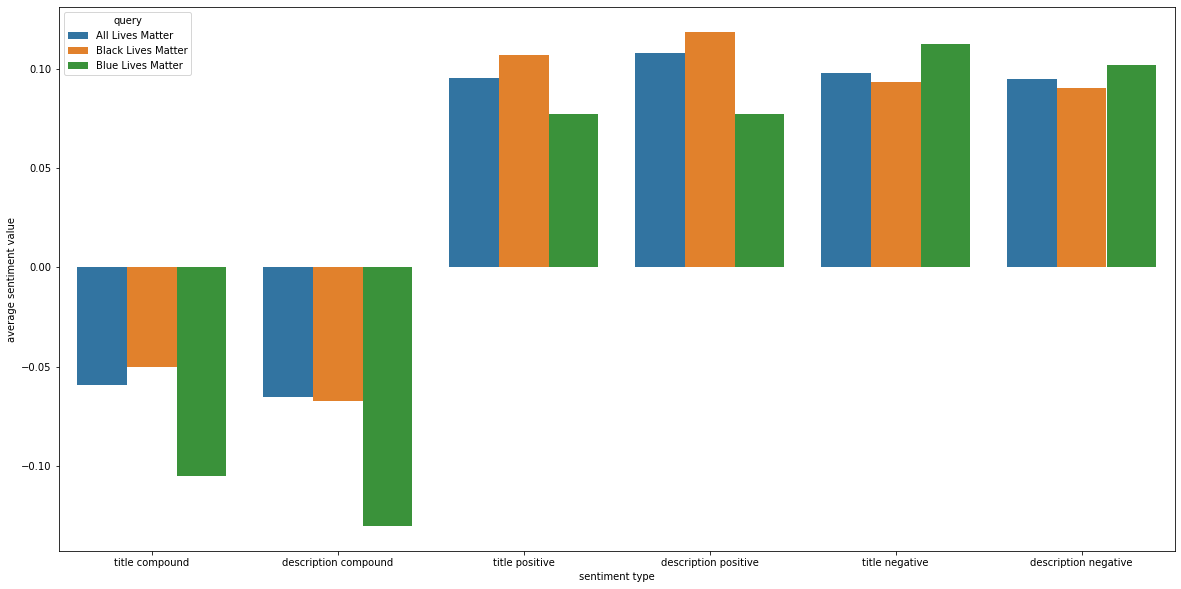

In [34]:
averageSentiment = allData.groupby(['query'])['title compound','description compound', "title positive", "description positive", "title negative", "description negative"].mean().unstack()

averageSentimentDf = pd.DataFrame(averageSentiment).reset_index()
averageSentimentDf = averageSentimentDf.rename(columns={0:"average sentiment value", "level_0": "sentiment type"})
f = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
sns.barplot(x="sentiment type", y= "average sentiment value", data=averageSentimentDf, hue='query')

In [35]:
def plotData(focus):
    f = plt.figure(figsize=(40,3))
    ax = plt.subplot(111)
#     focus = 'description positive'
    allData['date round'] = [x.strftime('%Y-%m-%d') for x in allData['date']]
    allData[allData['date round'] > '2020-06-14'].groupby('query').plot(x='date', y=focus, ax = ax)
    plt.ylabel(focus + ' sentiment')
    plt.title(focus + " over the past month")
    plt.xlabel("Date")
    plt.legend(['All Lives Matter', "Black Lives Matter", 'Blue Lives Matter'])

In [39]:
def plotDataRollingAverages(focus):
    f = plt.figure(figsize=(15,3))
    ax = plt.subplot(111)
    allData['date round'] = [x.strftime('%Y-%m-%d') for x in allData['date']]
    allData[allData['date round'] > '2020-06-13'].groupby(['query','date round'])[focus].mean().reset_index().groupby('query').plot(x='date round', y=focus, ax = ax)
    plt.legend(['All Lives Matter', "Black Lives Matter", 'Blue Lives Matter'])
    plt.ylabel(focus + ' sentiment')
    plt.xlabel("Date")
    plt.title("Rolling averages of " + focus + " over the past month")

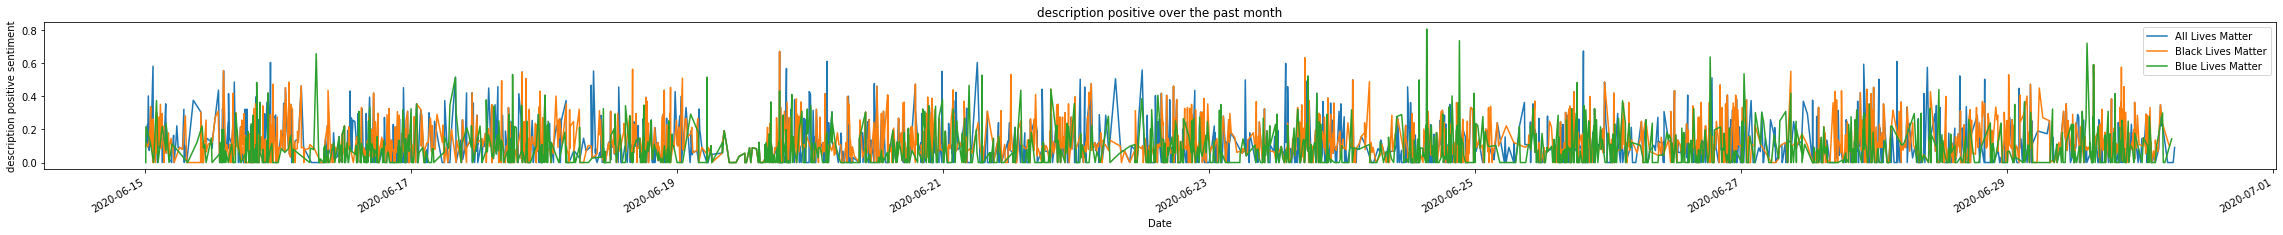

In [40]:
plotData('description positive')

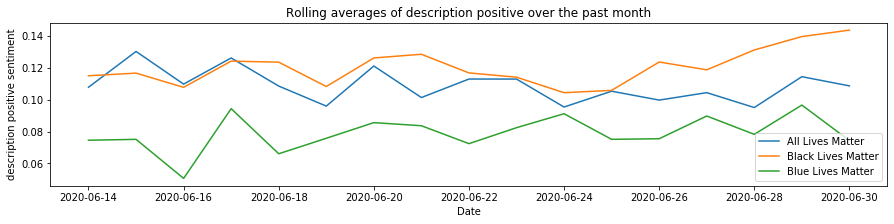

In [41]:
plotDataRollingAverages('description positive')

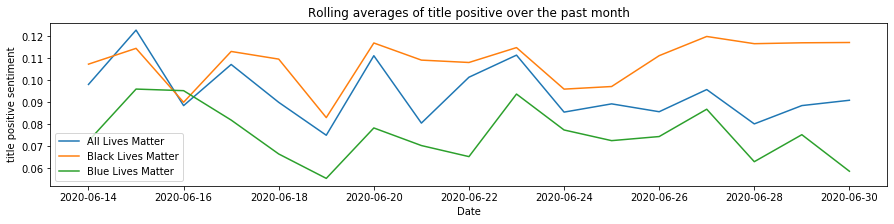

In [42]:
plotDataRollingAverages('title positive')

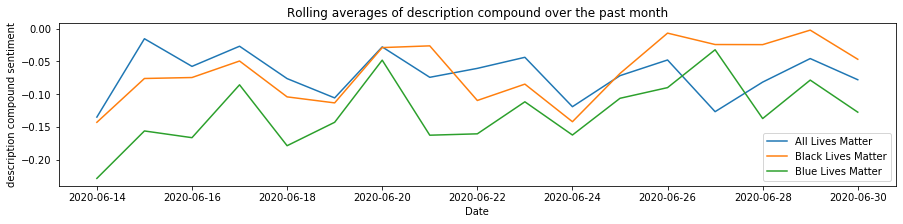

In [43]:
plotDataRollingAverages('description compound')

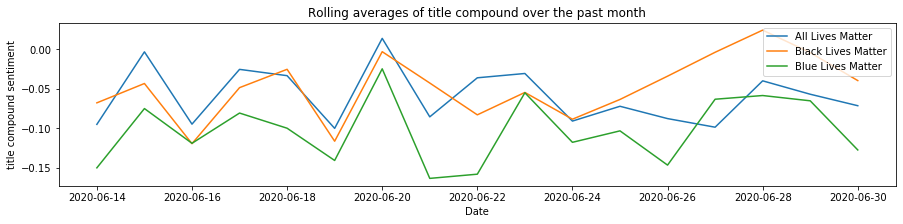

In [44]:
plotDataRollingAverages('title compound')

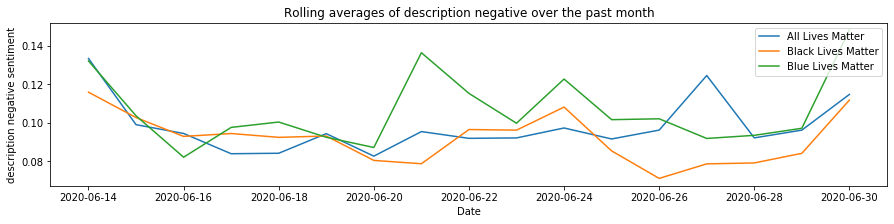

In [45]:
plotDataRollingAverages('description negative')

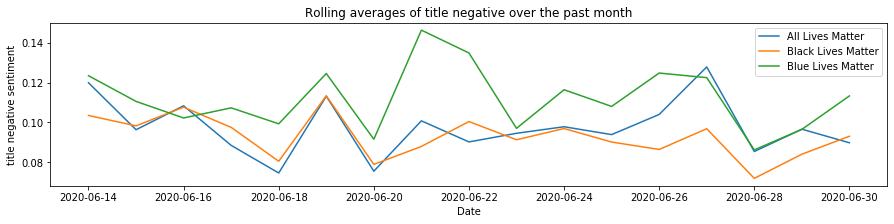

In [46]:
plotDataRollingAverages('title negative')

NameError: name 'focus' is not defined

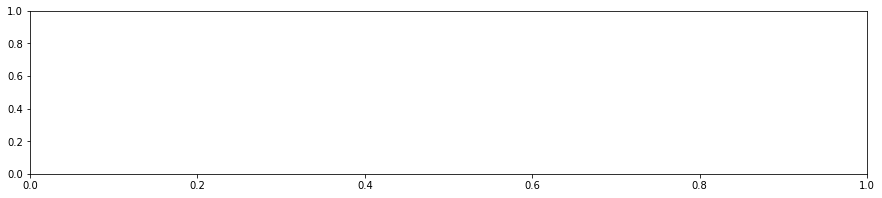

In [48]:
f = plt.figure(figsize=(15,3))
ax = plt.subplot(111)
allData[(allData['date round'] > '2020-06-13') & (allData['date round'] < '2020-06-28')].groupby(['query','date round'])['title compound'].count().reset_index().groupby('query').plot(x='date round', y=focus, ax = ax)
plt.legend(['All Lives Matter', "Black Lives Matter", 'Blue Lives Matter'])
plt.xlabel("Date")
plt.ylabel("Article Count")
plt.title("Article Count" + " per Day")